# Cambios de forma con Melt
## links
- tutorial para dataframe: https://towardsdatascience.com/reshape-pandas-dataframe-with-melt-in-python-tutorial-and-visualization-29ec1450bb02
- doc oficial:  https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-melt
- Lo mismo pero con Numpy: https://towardsdatascience.com/reshaping-numpy-arrays-in-python-a-step-by-step-pictorial-tutorial-aed5f471cf0b


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image # para incluir imagenes local

Ahora creamos la sitribución aleatoria

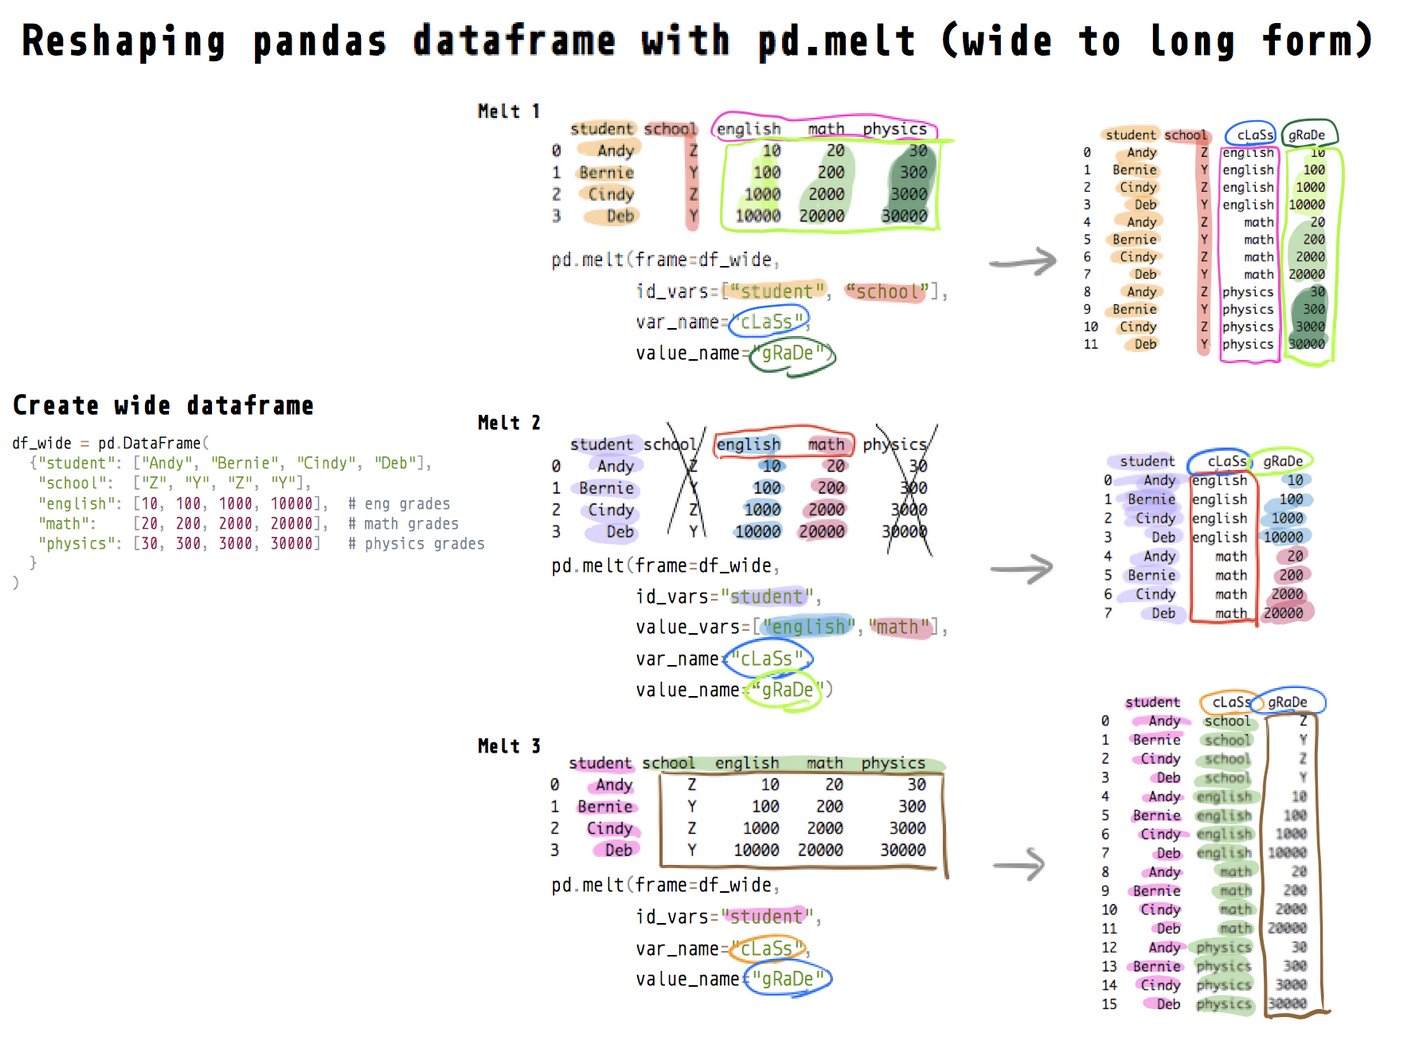

In [3]:
Image("./T1.ReshapePandas_dataframe.png")

Creqamos el dataframe "wide"

In [16]:
df_wide = pd.DataFrame(
  {"Estudiante": ["Paco", "Berto", "Ceci", "Daniela"],
   "Escuela":  ["Z", "Y", "Z", "Y"],
   "Ingles": [10, 100, 1000, 10000],  # eng grades
   "Mates":    [20, 200, 2000, 20000],  # math grades
   "Física": [30, 300, 3000, 30000]   # physics grades
  }
)
df_wide

# df_wide.transpose()
# df_melt = df_wide.pivot_table("student", "school", "class", "grade")

,Estudiante,Escuela,Ingles,Mates,Física
0,Paco,Z,10,20,30
1,Berto,Y,100,200,300
2,Ceci,Z,1000,2000,3000
3,Daniela,Y,10000,20000,30000


## melting
es como un "ungroup by"
- id_vars: le pasamos las variables que estan agrupadas, en este caso *student* y *school*
- var_name: el resto de columnas numericas se dan en tupla, con el nombre de la columna en var_name.
- value_name: el resto de columnas numericas se dan en tupla, con el valor de la columna en value_name

En var_name y value_name ponemos la etiqueta que corresponda a los campos numéricos, en este caso la clase y la nota en dicha clase.


In [18]:
df_wide.melt(id_vars=["Estudiante", "Escuela"],
             var_name="Asignatura",
             value_name="Nota")

,Estudiante,Escuela,Asignatura,Nota
0,Paco,Z,Ingles,10
1,Berto,Y,Ingles,100
2,Ceci,Z,Ingles,1000
3,Daniela,Y,Ingles,10000
4,Paco,Z,Mates,20
5,Berto,Y,Mates,200
6,Ceci,Z,Mates,2000
7,Daniela,Y,Mates,20000
8,Paco,Z,Física,30
9,Berto,Y,Física,300


## Selección de columnas

Podemos especificar que variables numéricas queremos desglosar, por ejemplo si sólo queremos las notas de ingles y mates:
- value_vars: columnas numéricas que queremos desglosar



In [19]:
df_wide.melt(id_vars=["Estudiante", "Escuela"],
             value_vars=["Mates","Física"],
             var_name="Asignatura",
             value_name="Nota")

,Estudiante,Escuela,Asignatura,Nota
0,Paco,Z,Mates,20
1,Berto,Y,Mates,200
2,Ceci,Z,Mates,2000
3,Daniela,Y,Mates,20000
4,Paco,Z,Física,30
5,Berto,Y,Física,300
6,Ceci,Z,Física,3000
7,Daniela,Y,Física,30000


##  Desglosar columnas no numéricas

Es posible sacar del "ungroup by" vars no numéricas y tenerlas en el desglose



In [22]:
df_wide.melt(id_vars=[ "Estudiante"],
             var_name="variable",
             value_name="valor")

,Estudiante,variable,valor
0,Paco,Escuela,Z
1,Berto,Escuela,Y
2,Ceci,Escuela,Z
3,Daniela,Escuela,Y
4,Paco,Ingles,10
5,Berto,Ingles,100
6,Ceci,Ingles,1000
7,Daniela,Ingles,10000
8,Paco,Mates,20
9,Berto,Mates,200
